# 03-05 : Time Series Analysis

referece: [Lecture 4: Pre-processing and advanced indexing](https://learn.london.ac.uk/mod/page/view.php?id=111306&forceview=1)

In [152]:
import pandas as pd
from typing import List
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Data Collection

### Functions

In [2]:
def set_category(dataframe:pd.DataFrame, column_name:str) -> None:
    """Set the specified column to be a category type."""
    dataframe[column_name] = dataframe[column_name].astype('category')

In [3]:
def set_ordinal(dataframe:pd.DataFrame, column_name:str, categories:List[str]) -> None:
    """Set the specified column to be a ordered category type."""
    dataframe[column_name] = dataframe[column_name].astype(
        pd.CategoricalDtype(categories=categories, ordered=True))

### Hellopter

In [4]:
# load the classified hellopeter data
df_hellopeter = pd.read_parquet('../../data/interim/01-06_human_classified.parquet')
df_hellopeter.set_index('id', inplace=True)

# show the data loaded
print(df_hellopeter.shape)
display(df_hellopeter.head(3))

(235, 16)


,created_at,review_rating,review_title,review_content,business_slug,chatbot_related,chatbot_evidence,chatbot_classification,chatbot_description,chatbot_suggestion,complaint_classification,complaint_service,complaint_description,complaint_suggestion,human_chatbot_classification,human_complaint_classification
id,,,,,,,,,,,,,,,,
3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,The customer is complaining about not being ab...,Improve the chatbot's availability and provide...,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...,"limited functionality, unable to contact human...",blacklist
3347241,2021-01-10 11:32:59,1,"Airtime charged, but not credited to my phone",Bought Airtime online through the Vodacom App ...,vodacom,1,The customer mentioned trying to chat with TOB...,Customer service,The customer complained about being thrown out...,Improve the stability of the chatbot to preven...,Billing,Airtime,The customer bought airtime online but it was ...,Investigate the issue and credit the airtime t...,"technical error, unable to contact human agent",missing airtime
3353838,2021-01-15 11:32:11,1,Chatbot Tobi/ Voice Bundle,I am disappointed at how your service has beco...,vodacom,1,The complaint mentions the introduction of a c...,Limited functionality,The chatbot has made it impossible for custome...,Improve the chatbot's capabilities to handle a...,Service issue,Voice Bundle,Failed to load voice bundle but debited the cu...,Load the customer's voice bundle or reimburse ...,"limited functionality, unable to contact human...",voice bundle


In [5]:
df_hellopeter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   created_at                      235 non-null    datetime64[ns]
 1   review_rating                   235 non-null    int64         
 2   review_title                    235 non-null    object        
 3   review_content                  235 non-null    object        
 4   business_slug                   235 non-null    object        
 5   chatbot_related                 235 non-null    int64         
 6   chatbot_evidence                235 non-null    object        
 7   chatbot_classification          235 non-null    object        
 8   chatbot_description             235 non-null    object        
 9   chatbot_suggestion              235 non-null    object        
 10  complaint_classification        235 non-null    object        
 11  c

In [6]:
def set_hellopeter_categorical(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Set the datatype for all categorical columns"""
    df_result = dataframe.copy()

    set_category(df_result, 'business_slug')
    set_category(df_result, 'chatbot_classification')
    set_category(df_result, 'complaint_classification')
    set_category(df_result, 'complaint_service')
    set_category(df_result, 'human_chatbot_classification')
    set_category(df_result, 'human_complaint_classification')

    return df_result

# set the categorical columns
df_hellopeter = set_hellopeter_categorical(df_hellopeter)
df_hellopeter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   created_at                      235 non-null    datetime64[ns]
 1   review_rating                   235 non-null    int64         
 2   review_title                    235 non-null    object        
 3   review_content                  235 non-null    object        
 4   business_slug                   235 non-null    category      
 5   chatbot_related                 235 non-null    int64         
 6   chatbot_evidence                235 non-null    object        
 7   chatbot_classification          235 non-null    category      
 8   chatbot_description             235 non-null    object        
 9   chatbot_suggestion              235 non-null    object        
 10  complaint_classification        235 non-null    category      
 11  c

In [7]:
def set_hellopeter_boolean(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Update the datatype of boolean columns"""
    df_result = dataframe.copy()
    df_result['chatbot_related'] = df_result['chatbot_related'].astype('bool')

    return df_result

# set the boolean columns
df_hellopeter = set_hellopeter_boolean(df_hellopeter)
df_hellopeter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 3344640 to 4522620
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   created_at                      235 non-null    datetime64[ns]
 1   review_rating                   235 non-null    int64         
 2   review_title                    235 non-null    object        
 3   review_content                  235 non-null    object        
 4   business_slug                   235 non-null    category      
 5   chatbot_related                 235 non-null    bool          
 6   chatbot_evidence                235 non-null    object        
 7   chatbot_classification          235 non-null    category      
 8   chatbot_description             235 non-null    object        
 9   chatbot_suggestion              235 non-null    object        
 10  complaint_classification        235 non-null    category      
 11  c

### Hellopeter Aspect Based Sentiment Analysis data

In [8]:
# load the hellopeter aspect based sentiment analysis data
df_hellopeter_absa = pd.read_parquet('../../data/interim/01-09_absa.parquet')

print(df_hellopeter_absa.shape)
display(df_hellopeter_absa.head())

(1595, 4)


,id,entity,aspect,polarity
0,3344640,Customer Service,"Availability (e.g., 24/7 support)",Negative
1,3344640,Chatbots,User-friendliness,Negative
2,3344640,Chatbots,Ability to understand query,Negative
3,3347241,Billing & Payments,Refunds/credits,Negative
4,3347241,Customer Service,Responsiveness,Negative


In [9]:
def set_hellopeter_absa_categorical(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Set the datatype for all categorical columns"""
    df_result = dataframe.copy()

    set_category(df_result, 'entity')
    set_category(df_result, 'aspect')
    set_ordinal(df_result, 'polarity', [
    'Negative',
    'Neutral',
    'Mixed',
    'Positive'])

    return df_result

# set the categorical columns
df_hellopeter_absa = set_hellopeter_absa_categorical(df_hellopeter_absa)
df_hellopeter_absa.info()

display(df_hellopeter_absa.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        1595 non-null   int64   
 1   entity    1595 non-null   category
 2   aspect    1595 non-null   category
 3   polarity  1595 non-null   category
dtypes: category(3), int64(1)
memory usage: 19.1 KB


,id,entity,aspect,polarity
0,3344640,Customer Service,"Availability (e.g., 24/7 support)",Negative
1,3344640,Chatbots,User-friendliness,Negative
2,3344640,Chatbots,Ability to understand query,Negative
3,3347241,Billing & Payments,Refunds/credits,Negative
4,3347241,Customer Service,Responsiveness,Negative


#### Data Perpetration

In [10]:
df_hellopeter_merged = pd.merge(df_hellopeter, df_hellopeter_absa, on='id', how='left')

#### Data Analysis

**Descriptive Statistics**: Start by getting a sense of the data distribution.

In [11]:
print(df_hellopeter_merged.describe())

                 id                     created_at  review_rating
count  1.595000e+03                           1595    1595.000000
mean   3.925785e+06  2022-04-29 23:45:41.296551936       1.062069
min    3.344640e+06            2021-01-07 13:22:34       1.000000
25%    3.660094e+06            2021-10-08 10:37:19       1.000000
50%    3.908402e+06            2022-04-29 08:47:29       1.000000
75%    4.220536e+06            2022-12-10 20:11:47       1.000000
max    4.522620e+06            2023-07-20 15:05:44       5.000000
std    3.266055e+05                            NaN       0.360238


**Aspect Frequency**: Check which aspects are mentioned most frequently.

In [12]:
hellopeter_aspect_counts = df_hellopeter_merged['aspect'].value_counts()
print(hellopeter_aspect_counts)

aspect
Ability to understand query                221
Responsiveness                             219
User-friendliness                          197
Response accuracy                          189
Knowledge/competence                        98
Availability (e.g., 24/7 support)           94
Account management (online portal/apps)     90
Escalation to human agents                  76
Billing accuracy                            49
Refunds/credits                             42
Resolution time                             37
Friendliness/professionalism                32
Speed of response                           30
Upgrade/downgrade process                   21
Hidden charges                              18
Signal strength                             16
Plan pricing                                15
Device reliability                          15
Monthly costs                               15
Plan flexibility                            13
Data speeds (4G, 5G, etc.)                  13
Networ

**Sentiment Distribution**: Check the distribution of sentiments across all feedback.

In [13]:
hellopeter_sentiment_counts = df_hellopeter_merged['polarity'].value_counts()
print(hellopeter_sentiment_counts)

polarity
Negative    1516
Neutral       61
Positive      16
Mixed          2
Name: count, dtype: int64


#### Data Visualization

Entity Frequency Bar Chart

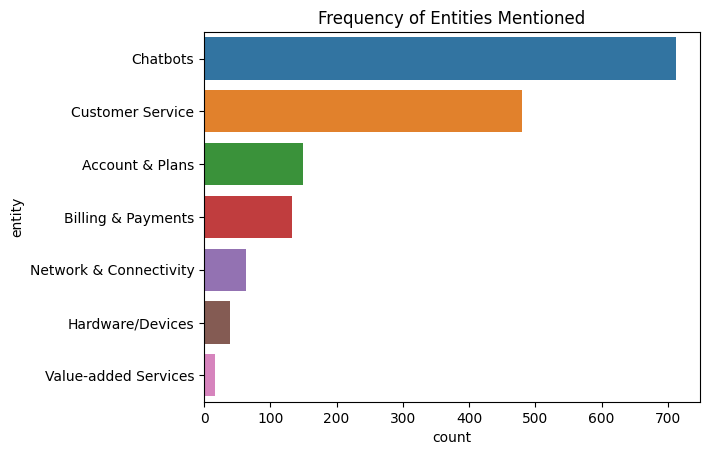

In [14]:
sns.countplot(
    data=df_hellopeter_merged,
    y='entity',
    order=df_hellopeter_merged['entity'].value_counts().index)
plt.title('Frequency of Entities Mentioned')
plt.show()

Aspect Frequency Bar Chart

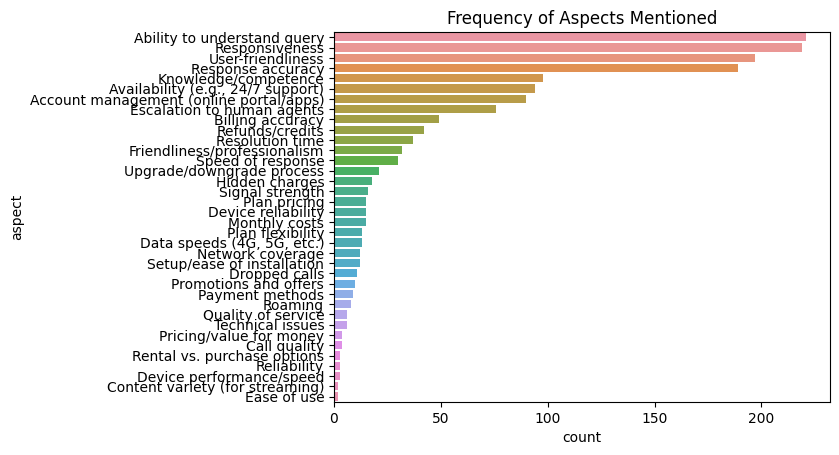

In [15]:
sns.countplot(
    data=df_hellopeter_merged,
    y='aspect',
    order=df_hellopeter_merged['aspect'].value_counts().index)
plt.title('Frequency of Aspects Mentioned')
plt.show()

Sentiment Distribution Pie Chart

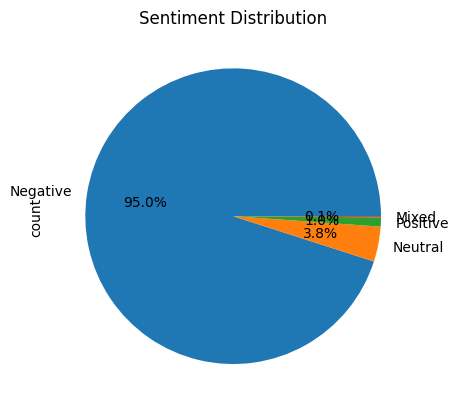

In [16]:
hellopeter_sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

Entity-wise Sentiment Distribution

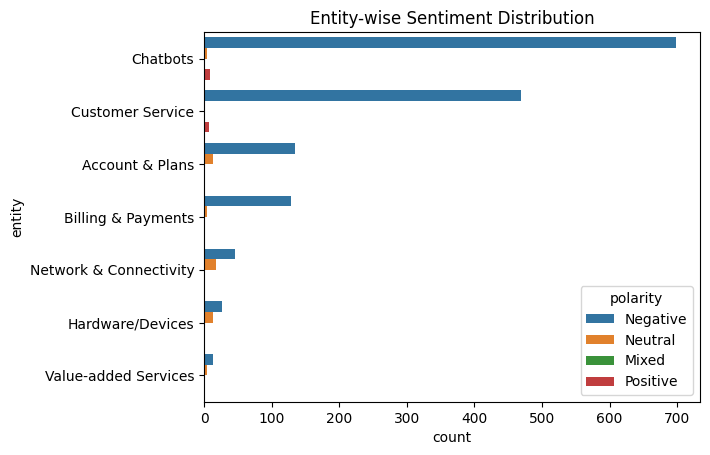

In [17]:
sns.countplot(
    data=df_hellopeter_merged,
    y='entity',
    hue='polarity',
    order=df_hellopeter_merged['entity'].value_counts().index)

plt.title('Entity-wise Sentiment Distribution')
plt.show()

Aspect-wise Sentiment Distribution

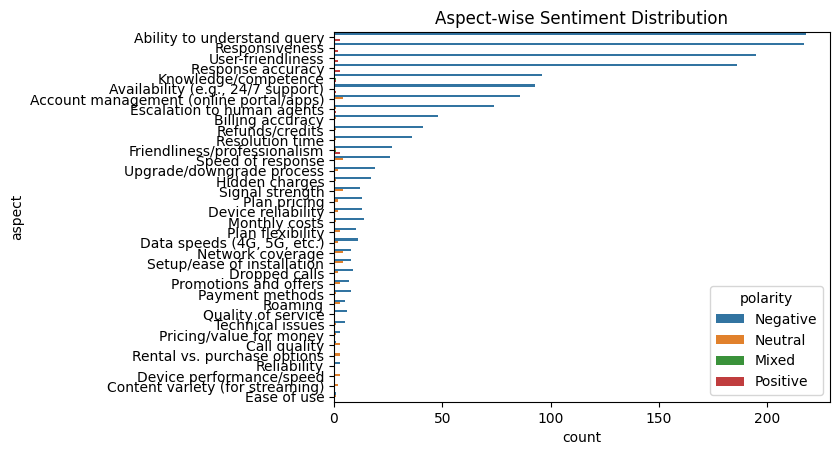

In [18]:
sns.countplot(
    data=df_hellopeter_merged,
    y='aspect',
    hue='polarity',
    order=df_hellopeter_merged['aspect'].value_counts().index)
plt.title('Aspect-wise Sentiment Distribution')
plt.show()

Review Rating Distribution

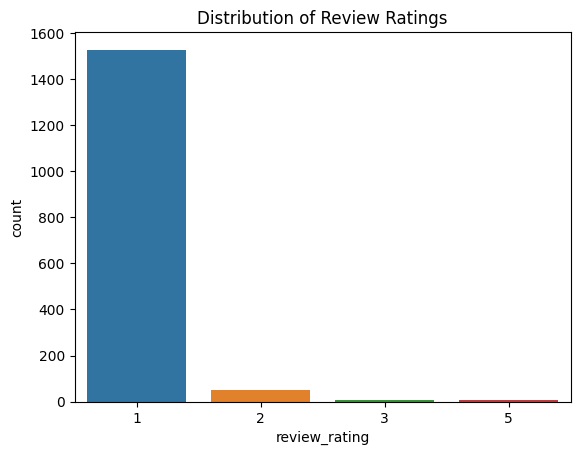

In [19]:
sns.countplot(data=df_hellopeter_merged, x='review_rating')
plt.title('Distribution of Review Ratings')
plt.show()

#### Advanced Analysis

Average Review Rating by Aspect

In [20]:
avg_rating_by_aspect = df_hellopeter_merged \
    .groupby('aspect')['review_rating'] \
    .mean() \
    .sort_values(ascending=False)
print(avg_rating_by_aspect)

aspect
Technical issues                           1.166667
Friendliness/professionalism               1.156250
Escalation to human agents                 1.105263
Availability (e.g., 24/7 support)          1.095745
Setup/ease of installation                 1.083333
Resolution time                            1.081081
Data speeds (4G, 5G, etc.)                 1.076923
Ability to understand query                1.072398
Refunds/credits                            1.071429
Account management (online portal/apps)    1.066667
Response accuracy                          1.063492
Knowledge/competence                       1.061224
User-friendliness                          1.060914
Responsiveness                             1.059361
Hidden charges                             1.055556
Speed of response                          1.033333
Billing accuracy                           1.020408
Rental vs. purchase options                1.000000
Upgrade/downgrade process                  1.000000
Signa

#### Entity and Aspect

In [21]:
df_hellopeter_merged.entity.value_counts()

entity
Chatbots                  713
Customer Service          480
Account & Plans           149
Billing & Payments        133
Network & Connectivity     64
Hardware/Devices           39
Value-added Services       17
Name: count, dtype: int64

In [22]:
categories = df_hellopeter_merged \
    .groupby(['entity', 'aspect'])['id'] \
    .count() \
    .reset_index() \
    .rename(columns={'id': 'count'}) \
    .sort_values(['entity', 'count'], ascending=[True, False])

display(categories)

,entity,aspect,count
1,Account & Plans,Account management (online portal/apps),90
34,Account & Plans,Upgrade/downgrade process,21
19,Account & Plans,Plan pricing,15
18,Account & Plans,Plan flexibility,13
21,Account & Plans,Promotions and offers,10
...,...,...,...
247,Value-added Services,Signal strength,0
248,Value-added Services,Speed of response,0
249,Value-added Services,Technical issues,0
250,Value-added Services,Upgrade/downgrade process,0


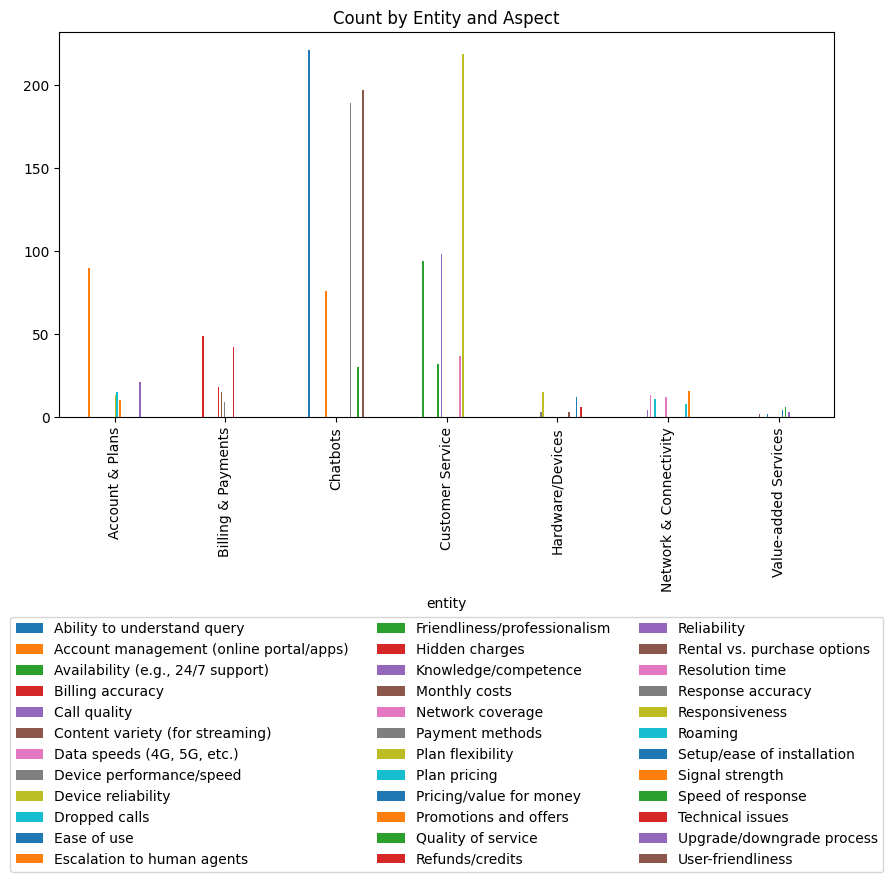

In [23]:
df_hellopeter_merged \
    .groupby(['entity', 'aspect'])['id'] \
    .count() \
    .unstack() \
    .plot(kind='bar', figsize=(10, 5))
plt.title('Count by Entity and Aspect')

# show the legend at the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)

plt.show()


## Entities Over Time

In [24]:
# select only the relevant columns for the analysis
df_hp_analysis = df_hellopeter_merged[[
    'id',
    'created_at',
    'review_rating',
    'business_slug',
    'entity',
    'aspect',
    'polarity'
]]

# convert polarity to numbers
df_hp_analysis['polarity_num'] = df_hp_analysis['polarity'].replace({
    'Positive': 1,
    'Mixed': 0.5,
    'Neutral': 0,
    'Negative': -1
}).astype('float')

# show the table
df_hp_analysis.head()

/tmp/ipykernel_20614/3922796219.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hp_analysis['polarity_num'] = df_hp_analysis['polarity'].replace({


,id,created_at,review_rating,business_slug,entity,aspect,polarity,polarity_num
0,3344640,2021-01-07 13:22:34,1,vodacom,Customer Service,"Availability (e.g., 24/7 support)",Negative,-1.0
1,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,User-friendliness,Negative,-1.0
2,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,Ability to understand query,Negative,-1.0
3,3347241,2021-01-10 11:32:59,1,vodacom,Billing & Payments,Refunds/credits,Negative,-1.0
4,3347241,2021-01-10 11:32:59,1,vodacom,Customer Service,Responsiveness,Negative,-1.0


In [25]:
# summarise by entity
df_hp_entity_sum = df_hp_analysis \
    .groupby([
        'id',
        'created_at',
        'review_rating',
        'business_slug',
        'entity'])['polarity_num'] \
    .mean() \
    .reset_index() \
    .dropna()

display(df_hp_entity_sum.head())

,id,created_at,review_rating,business_slug,entity,polarity_num
30,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,-1.0
31,3344640,2021-01-07 13:22:34,1,vodacom,Customer Service,-1.0
33068,3347241,2021-01-10 11:32:59,1,vodacom,Account & Plans,-1.0
33069,3347241,2021-01-10 11:32:59,1,vodacom,Billing & Payments,-1.0
33070,3347241,2021-01-10 11:32:59,1,vodacom,Chatbots,-1.0


In [26]:
df_hp_entity_sum.polarity_num.value_counts()

polarity_num
-1.000000    725
 0.000000     16
 1.000000      6
-0.800000      4
-0.600000      4
-0.400000      2
-0.200000      1
-0.500000      1
-0.333333      1
-0.250000      1
Name: count, dtype: int64

In [27]:
def map_polarity_nums(data:pd.DataFrame, column):
    df_result = data.copy()

    df_result[column] = (df_result[column] * 2).round() / 2
    df_result[column] = df_result[column].replace(-0.5, 0.5)

    return df_result


In [28]:
# map back to valid polarity values
df_hp_entity_sum = map_polarity_nums(df_hp_entity_sum, 'polarity_num')
df_hp_entity_sum.polarity_num.value_counts()

polarity_num
-1.0    729
 0.0     18
 0.5      8
 1.0      6
Name: count, dtype: int64

### Entity Count over Time

In [29]:
df_hp_entity_count = df_hp_entity_sum.copy()
df_hp_entity_count['polarity'] = df_hp_entity_count['polarity_num'].replace({
    1.0: 'Positive',
    0.5: 'Mixed',
    0.0: 'Neutral',
    -1.0: 'Negative'
})
set_category(df_hp_entity_count, 'polarity')

# one-hot encode the polarity column
df_onehot = pd.get_dummies(df_hp_entity_count['polarity'])
df_onehot = df_onehot.astype(int)
df_hp_entity_count = df_hp_entity_count.join(df_onehot)

set_ordinal(df_hp_entity_count, 'polarity', [
    'Negative',
    'Neutral',
    'Mixed',
    'Positive'])

df_hp_entity_count.head()

,id,created_at,review_rating,business_slug,entity,polarity_num,polarity,Mixed,Negative,Neutral,Positive
30,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,-1.0,Negative,0,1,0,0
31,3344640,2021-01-07 13:22:34,1,vodacom,Customer Service,-1.0,Negative,0,1,0,0
33068,3347241,2021-01-10 11:32:59,1,vodacom,Account & Plans,-1.0,Negative,0,1,0,0
33069,3347241,2021-01-10 11:32:59,1,vodacom,Billing & Payments,-1.0,Negative,0,1,0,0
33070,3347241,2021-01-10 11:32:59,1,vodacom,Chatbots,-1.0,Negative,0,1,0,0


In [30]:
df_hp_entity_polarity = df_hp_entity_count \
    .groupby([
        'business_slug', 
        'entity',
        'polarity']) \
    .resample('M', on='created_at') \
    [['id']] \
    .count() \
    .fillna(0) \
    .rename(columns={'id': 'count'})

df_hp_entity_polarity.sample(10)

count
business_slug entity                 polarity created_at       
mtn           Account & Plans        Negative 2022-11-30      0
telkom        Chatbots               Negative 2023-02-28      0
              Customer Service       Negative 2021-09-30      1
vodacom       Network & Connectivity Negative 2023-02-28      1
mtn           Chatbots               Negative 2021-12-31      0
vodacom       Value-added Services   Negative 2022-03-31      0
mtn           Customer Service       Negative 2021-10-31      0
              Account & Plans        Negative 2022-03-31      0
vodacom       Account & Plans        Negative 2021-10-31      5
                                              2022-02-28      5

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


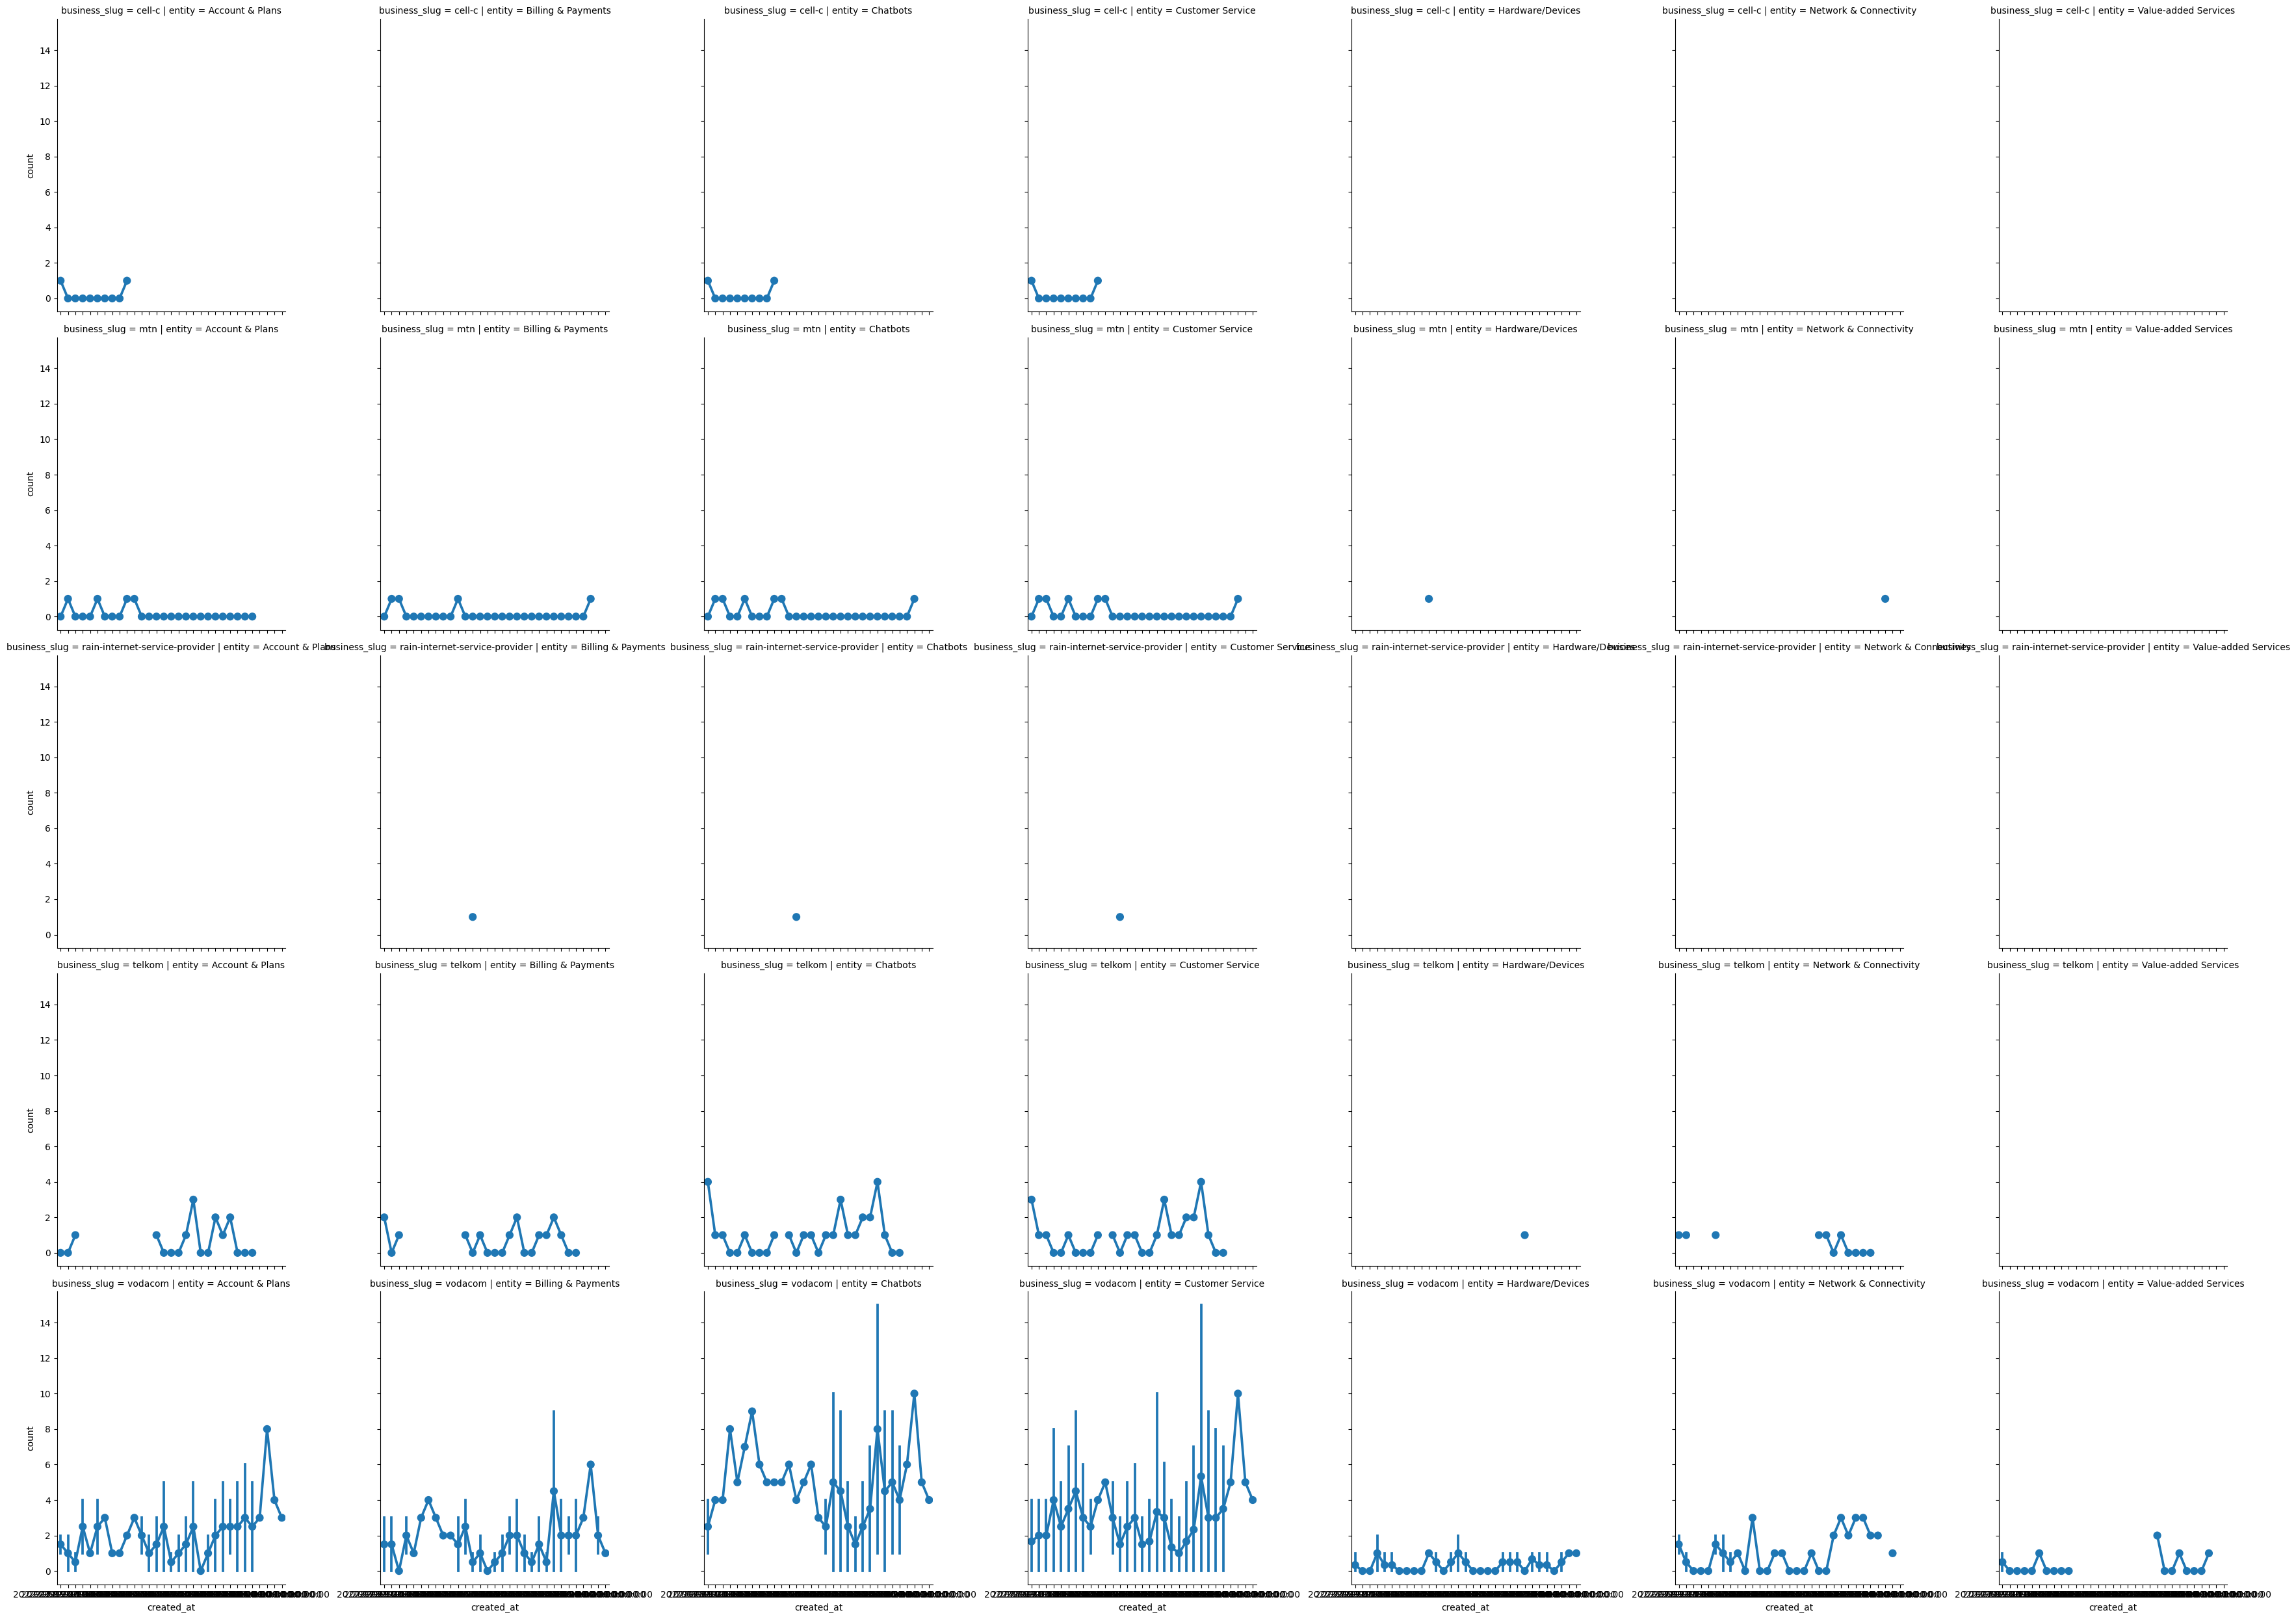

In [31]:
sns.catplot(
    data=df_hp_entity_polarity.reset_index(),
    x='created_at',
    y="count",
    col='entity',
    row='business_slug',
    kind='point'
)

<Axes: xlabel='created_at', ylabel='count'>

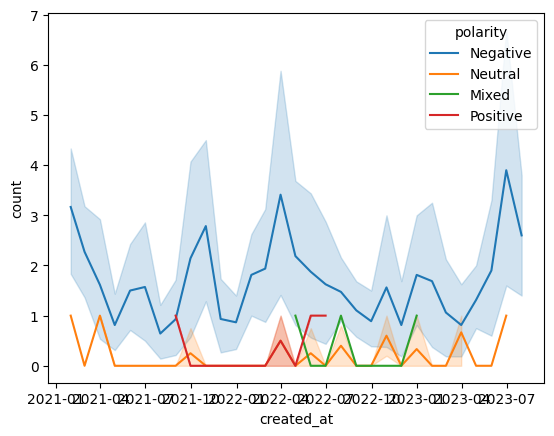

In [32]:
sns.lineplot(
    data=df_hp_entity_polarity.reset_index(),
    x='created_at',
    y='count',
    hue='polarity',
)

In [33]:
df_hp_entity_count_group = df_hp_entity_count \
    .groupby([
        'business_slug', 
        'entity']) \
    .resample('M', on='created_at') \
    [['Mixed', 'Negative', 'Neutral', 'Positive']] \
    .sum() \

df_hp_entity_count_group.sample(n=5, random_state=64)

Mixed  \
business_slug                  entity                 created_at          
vodacom                        Customer Service       2022-03-31      0   
                               Chatbots               2021-11-30      0   
rain-internet-service-provider Chatbots               2021-04-30      0   
telkom                         Customer Service       2022-04-30      0   
                               Network & Connectivity 2022-08-31      0   

                                                                  Negative  \
business_slug                  entity                 created_at             
vodacom                        Customer Service       2022-03-31        15   
                               Chatbots               2021-11-30         5   
rain-internet-service-provider Chatbots               2021-04-30         1   
telkom                         Customer Service       2022-04-30         1   
                               Network & Connectivity 2022-08-31         1   

                                                                  Neutral  \
business_slug                  entity                 created_at            
vodacom                        Customer Service       2022-03-31        1   
                               Chatbots               2021-11-30        0   
rain-internet-service-provider Chatbots               2021-04-30        0   
telkom                         Customer Service       2022-04-30        0   
                               Network & Connectivity 2022-08-31        0   

                                                                  Positive  
business_slug                  entity                 created_at            
vodacom                        Customer Service       2022-03-31         0  
                               Chatbots               2021-11-30         0  
rain-internet-service-provider Chatbots               2021-04-30         0  
telkom                         Customer Service       2022-04-30         0  
                               Network & Connectivity 2022-08-31         0

### Factor Plot

In [34]:
# resample the data to monthly
df_hp_entity_monthly_pol = df_hp_entity_sum \
    .drop(columns=['id']) \
    .groupby([
        'business_slug',
        'entity']) \
    .resample('M', on='created_at') \
    .mean() \
    .reset_index() \
    .dropna()

# map the polarity back to the expected categories
df_hp_entity_monthly_pol = map_polarity_nums(df_hp_entity_monthly_pol, 'polarity_num')

# add the month and year columns
df_hp_entity_monthly_pol['month'] = df_hp_entity_monthly_pol['created_at'].dt.month
df_hp_entity_monthly_pol['year'] = df_hp_entity_monthly_pol['created_at'].dt.year

# display the head
df_hp_entity_monthly_pol.head()

,business_slug,entity,created_at,review_rating,polarity_num,month,year
0,cell-c,Account & Plans,2022-07-31,1.0,-1.0,7,2022
9,cell-c,Account & Plans,2023-04-30,1.0,-1.0,4,2023
10,cell-c,Chatbots,2022-07-31,1.0,-1.0,7,2022
19,cell-c,Chatbots,2023-04-30,1.0,-1.0,4,2023
20,cell-c,Customer Service,2022-07-31,1.0,-1.0,7,2022


/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


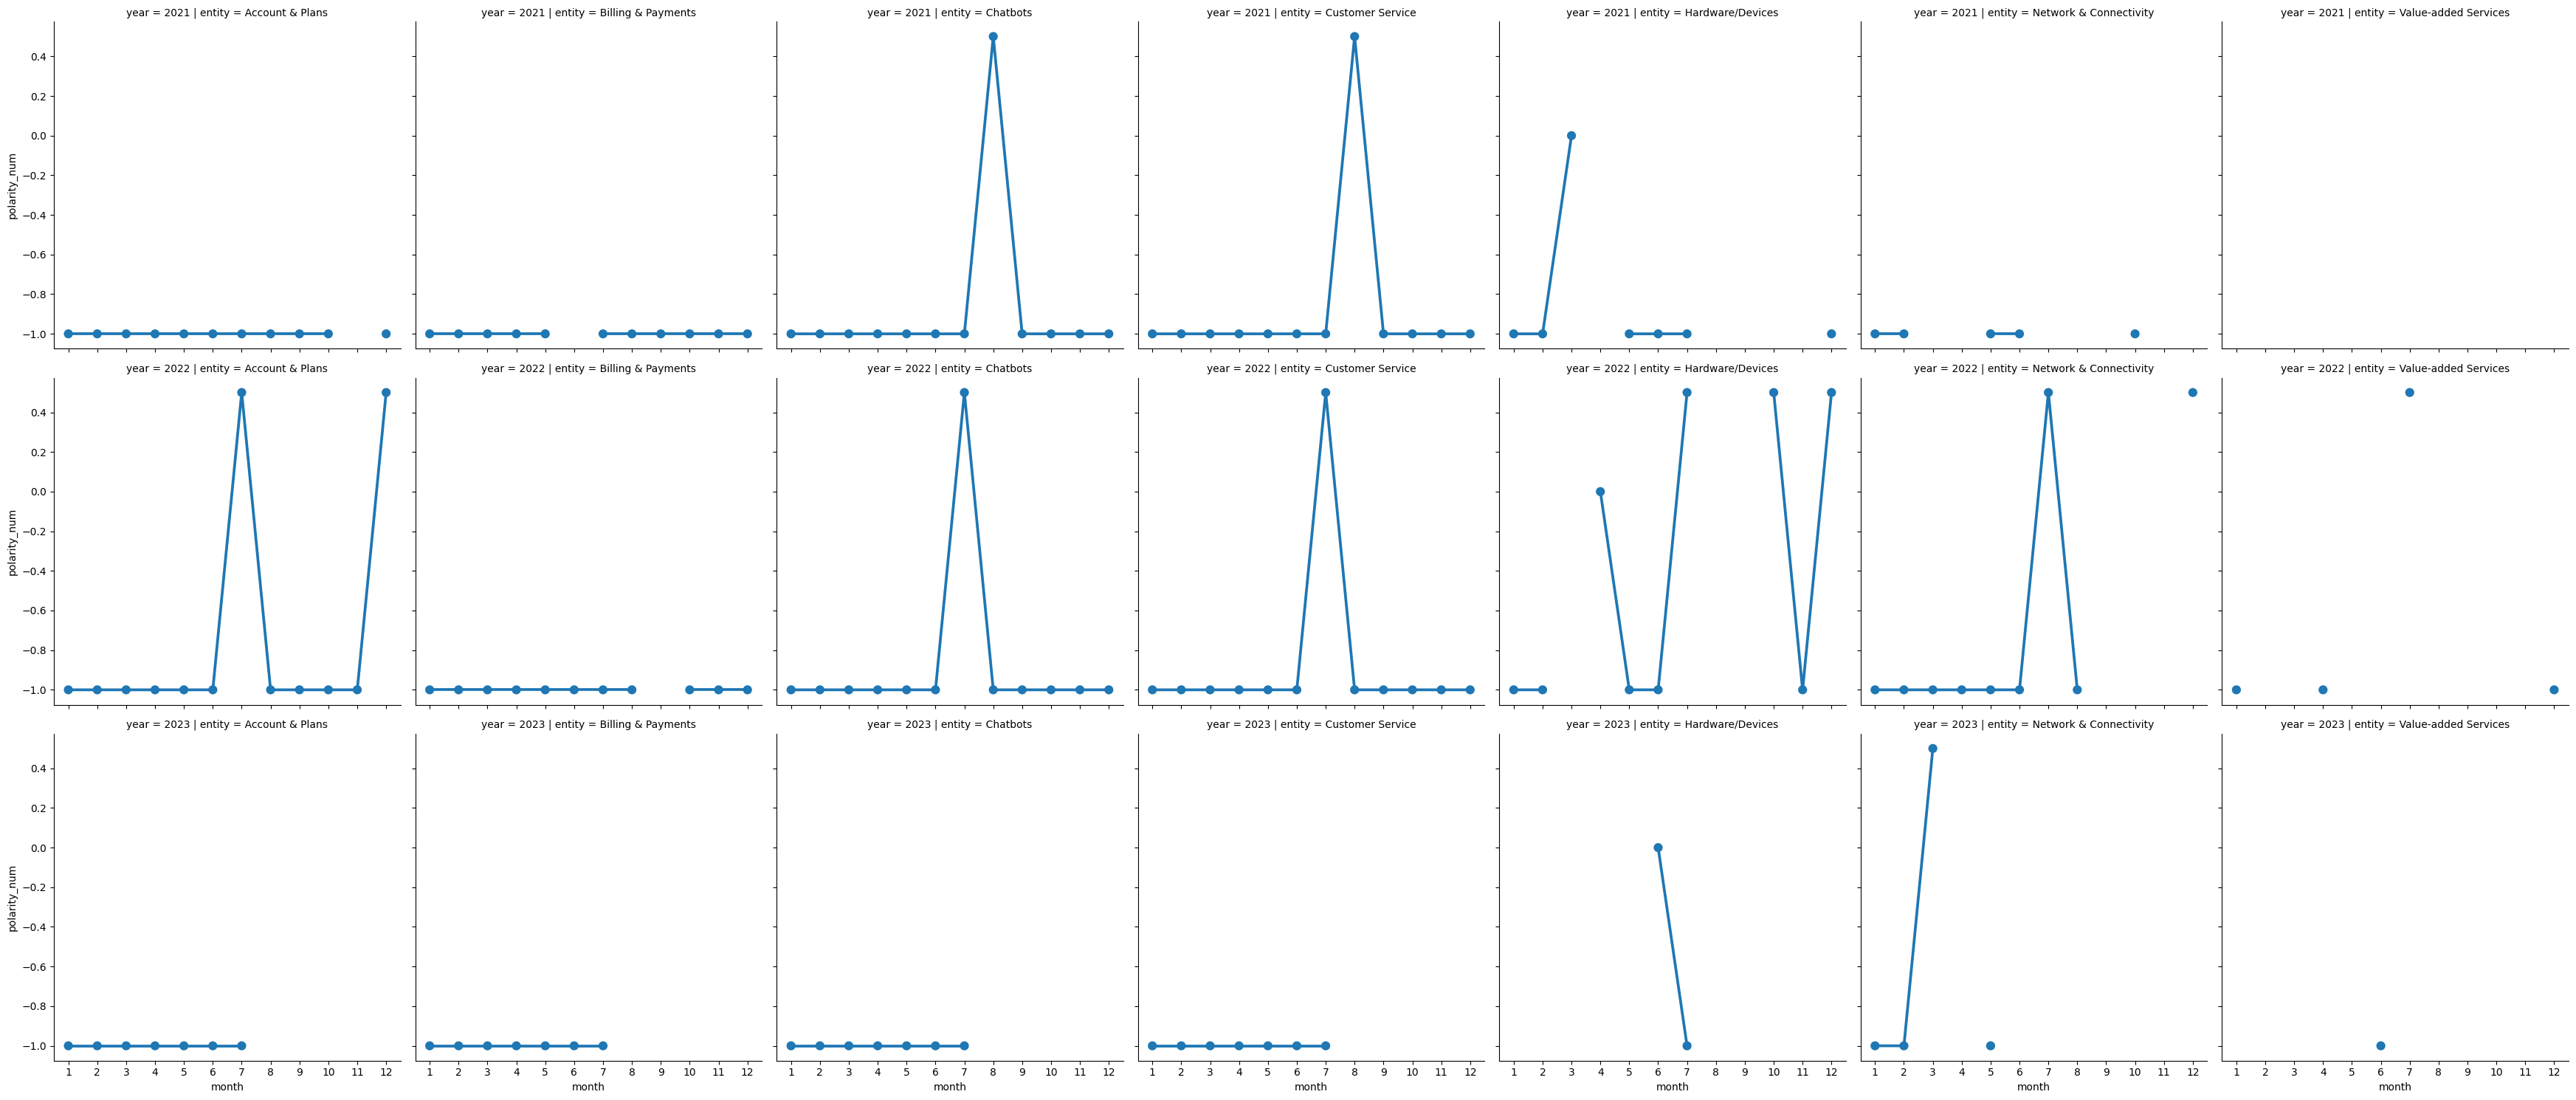

In [35]:
sns.catplot(
    data=df_hp_entity_monthly_pol[df_hp_entity_monthly_pol['business_slug'] == 'vodacom'],
    x='month',
    y="polarity_num",
    col='entity',
    row='year',
    kind='point',
)

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


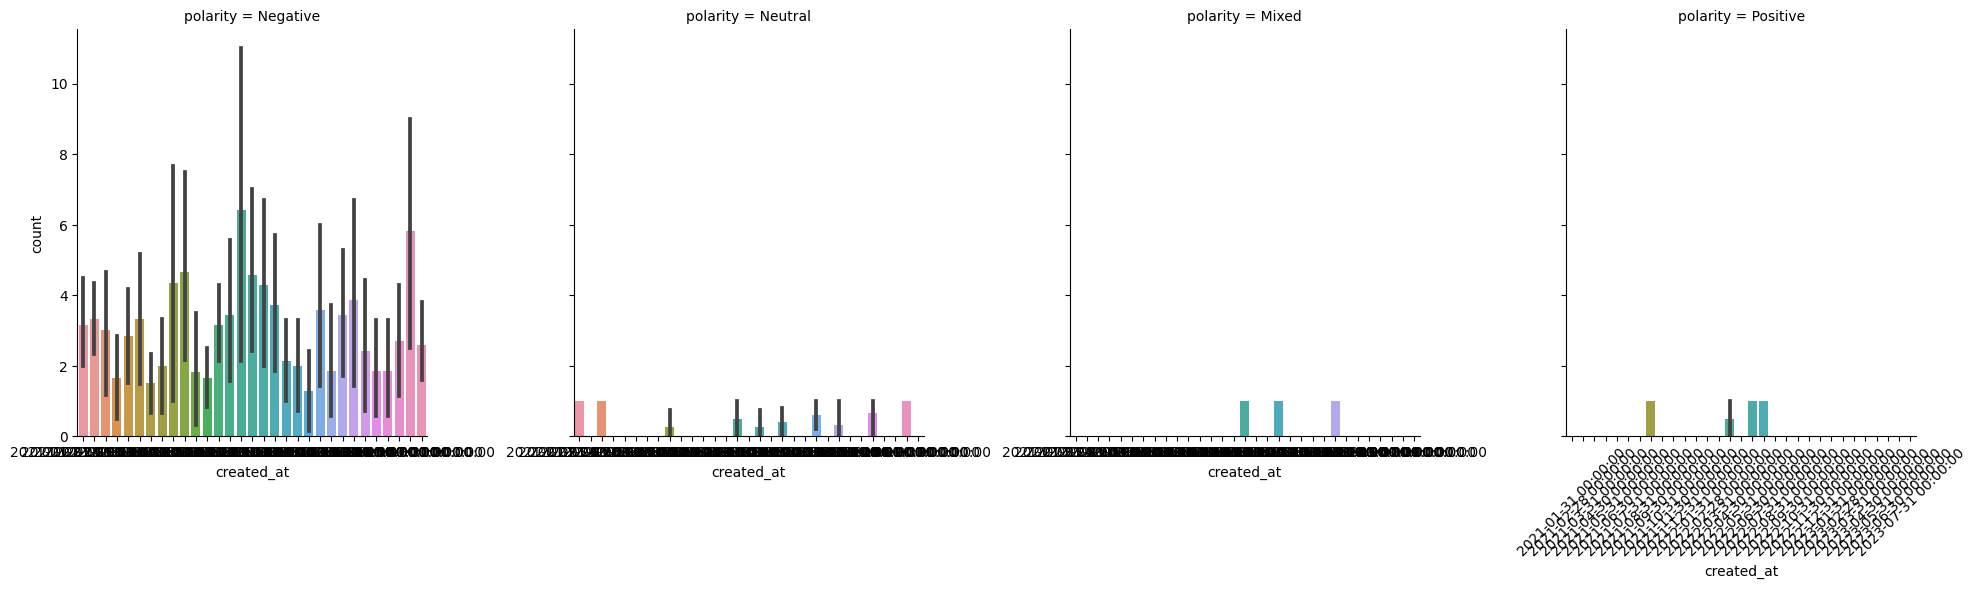

In [36]:
sns.catplot(
    data=df_hp_entity_polarity \
        .reset_index() \
        .query('business_slug == "vodacom"'),
    x='created_at',
    y='count',
    col='polarity',
    kind='bar'
)

plt.xticks(rotation=45)
plt.show()

In [37]:
display(sns.color_palette("tab10"))
print(sns.color_palette("tab10").as_hex())

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


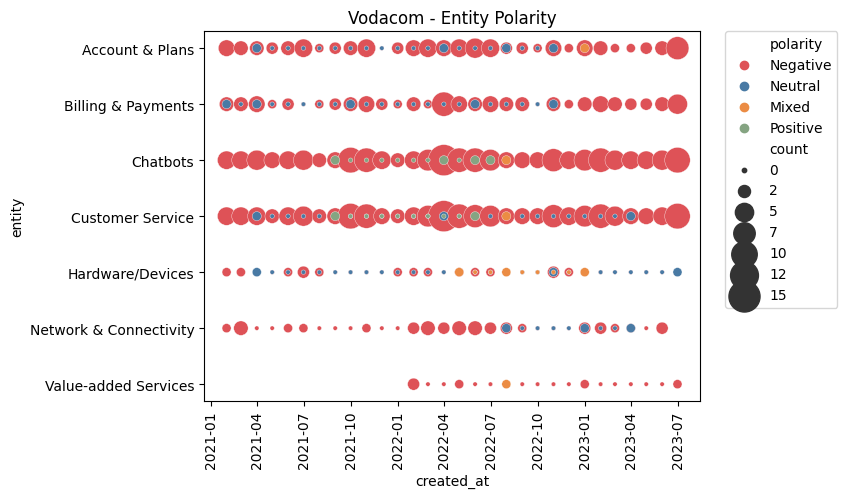

In [38]:
df_plot = df_hp_entity_polarity \
        .reset_index() \
        .query('business_slug == "vodacom" and created_at < "2023-07-01"') \
        #.query('business_slug == "vodacom" and polarity == "Negative" and created_at < "2023-07-01"') \

# sns.swarmplot(
#     data=df_plot,
#     x='created_at',
#     y='entity'
# )

# sns.catplot(
#     data=df_plot,
#     x='created_at',
#     y='entity')

# sns.relplot(
#     data=df_plot,
#     x='created_at',
#     y='entity',
#     size='count'
# )

color_dict = dict({'Positive':'#85a482',
                  'Neutral': '#497aa4',
                  'Negative': '#de5257',
                  'Mixed': '#eb8c44'})

sns.scatterplot(
    data=df_plot,
    x='created_at',
    y='entity',
    hue='polarity',
    size='count',
    palette=color_dict,
    sizes=(10, 500))

# sns.stripplot(
#     data=df_plot,
#     x='created_at',
#     y='entity',
#     hue='polarity')

# sns.lineplot(
#     data=df_plot,
#     x='created_at',
#     y='count',
#     hue='entity'
# )

plt.title('Vodacom - Entity Polarity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

In [39]:
# # plot the barplot
# sns.barplot(
#     data=df_plot,
#     x='created_at',
#     y='count',
#     hue='polarity',
#     palette=color_dict)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xticks(rotation=90)
# plt.show()    

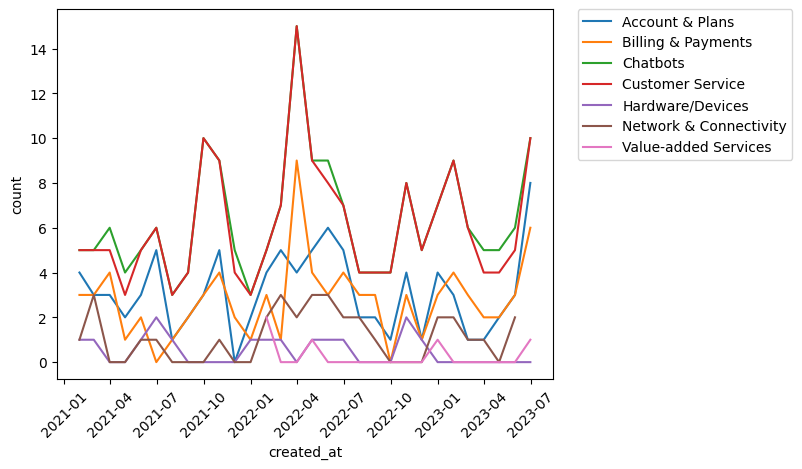

In [40]:
df_plot = df_hp_entity_polarity \
        .reset_index() \
        .query('business_slug == "vodacom" and polarity == "Negative" and created_at < "2023-07-01"') \

sns.lineplot(
    data=df_plot,
    x='created_at',
    y='count',
    hue='entity'
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

In [41]:
df_hp_entity_polarity \
        .reset_index() \
        .query('entity == "Chatbots" and business_slug == "vodacom"')

,business_slug,entity,polarity,created_at,count
354,vodacom,Chatbots,Negative,2021-01-31,5
355,vodacom,Chatbots,Negative,2021-02-28,5
356,vodacom,Chatbots,Negative,2021-03-31,6
357,vodacom,Chatbots,Negative,2021-04-30,4
358,vodacom,Chatbots,Negative,2021-05-31,5
359,vodacom,Chatbots,Negative,2021-06-30,6
360,vodacom,Chatbots,Negative,2021-07-31,3
361,vodacom,Chatbots,Negative,2021-08-31,4
362,vodacom,Chatbots,Negative,2021-09-30,10
363,vodacom,Chatbots,Negative,2021-10-31,9


/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


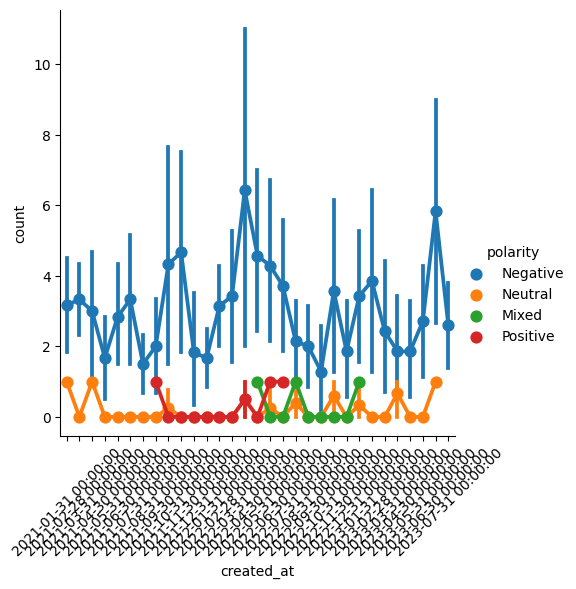

In [42]:
sns.catplot(
    data=df_hp_entity_polarity \
        .reset_index() \
        .query('business_slug == "vodacom"'),
    x='created_at',
    y='count',
    hue='polarity',
    
    kind='point')

plt.xticks(rotation=45)
plt.show()

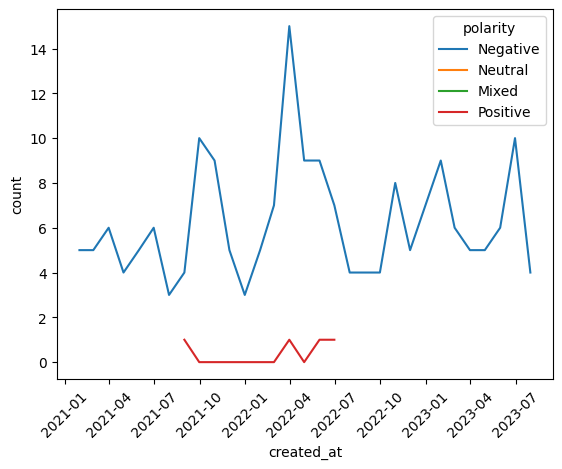

In [43]:
sns.lineplot(
    data=df_hp_entity_polarity \
        .reset_index() \
        .query('entity == "Chatbots" and business_slug == "vodacom"'),
    x='created_at',
    y='count',
    hue='polarity')

plt.xticks(rotation=45)
plt.show()

## Not Making Progress - Look at Lecture 4 Videos

In [176]:
relevant_columns = [
    'id',
    'created_at',
    'review_rating',
    'business_slug',
    'entity',
    'aspect',
    'polarity'
]

In [177]:
# merge the reviews with the aspect based sentiment analysis data
df_hp_merged = pd.merge(df_hellopeter, df_hellopeter_absa, on='id', how='left')

# select only the relevant columns for the analysis
df_hp_merged = df_hp_merged[relevant_columns]

print(df_hp_merged.shape)
display(df_hp_merged.head(3))

(1595, 7)


,id,created_at,review_rating,business_slug,entity,aspect,polarity
0,3344640,2021-01-07 13:22:34,1,vodacom,Customer Service,"Availability (e.g., 24/7 support)",Negative
1,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,User-friendliness,Negative
2,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,Ability to understand query,Negative


In [178]:
df_hp_merged.polarity.value_counts()

polarity
Negative    1516
Neutral       61
Positive      16
Mixed          2
Name: count, dtype: int64

In [179]:
#df_hp_merged.set_index(['id', 'created_at', 'business_slug', 'entity', 'aspect', 'polarity'], inplace=True)

In [180]:
df_hp_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1595 non-null   int64         
 1   created_at     1595 non-null   datetime64[ns]
 2   review_rating  1595 non-null   int64         
 3   business_slug  1595 non-null   category      
 4   entity         1595 non-null   category      
 5   aspect         1595 non-null   category      
 6   polarity       1595 non-null   category      
dtypes: category(4), datetime64[ns](1), int64(2)
memory usage: 45.8 KB


In [181]:
df_hp_merged.review_rating.describe()

count    1595.000000
mean        1.062069
std         0.360238
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: review_rating, dtype: float64

In [182]:
# change polarity tp columns
df_hp_merged_polarity = pd.concat([
    df_hp_merged, 
    pd.get_dummies(df_hp_merged['polarity']).astype(int)],
    axis=1).drop(columns=['polarity'])

df_hp_merged_polarity

,id,created_at,review_rating,business_slug,entity,aspect,Negative,Neutral,Mixed,Positive
0,3344640,2021-01-07 13:22:34,1,vodacom,Customer Service,"Availability (e.g., 24/7 support)",1,0,0,0
1,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,User-friendliness,1,0,0,0
2,3344640,2021-01-07 13:22:34,1,vodacom,Chatbots,Ability to understand query,1,0,0,0
3,3347241,2021-01-10 11:32:59,1,vodacom,Billing & Payments,Refunds/credits,1,0,0,0
4,3347241,2021-01-10 11:32:59,1,vodacom,Customer Service,Responsiveness,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1590,4522620,2023-07-20 15:05:44,3,vodacom,Chatbots,User-friendliness,1,0,0,0
1591,4522620,2023-07-20 15:05:44,3,vodacom,Chatbots,Response accuracy,1,0,0,0
1592,4522620,2023-07-20 15:05:44,3,vodacom,Chatbots,Ability to understand query,1,0,0,0
1593,4522620,2023-07-20 15:05:44,3,vodacom,Chatbots,Escalation to human agents,1,0,0,0


In [183]:
# resample the data to monthly
df_hp_monthly = df_hp_merged_polarity \
    .drop(columns=['id']) \
    .groupby([
        'business_slug',
        'entity',
        'aspect',
    ]) \
    .resample('M', on='created_at') \
    .agg({
        'review_rating': 'mean',
        'Negative': 'sum',
        'Neutral': 'sum',
        'Mixed': 'sum',
        'Positive': 'sum'
    })

df_hp_monthly

review_rating  \
business_slug entity               aspect                                  created_at                  
cell-c        Account & Plans      Account management (online portal/apps) 2022-07-31            1.0   
                                                                           2022-08-31            NaN   
                                                                           2022-09-30            NaN   
                                                                           2022-10-31            NaN   
                                                                           2022-11-30            NaN   
...                                                                                              ...   
vodacom       Value-added Services Reliability                             2022-08-31            NaN   
                                                                           2022-09-30            NaN   
                                                                           2022-10-31            NaN   
                                                                           2022-11-30            NaN   
                                                                           2022-12-31            1.0   

                                                                                       Negative  \
business_slug entity               aspect                                  created_at             
cell-c        Account & Plans      Account management (online portal/apps) 2022-07-31         1   
                                                                           2022-08-31         0   
                                                                           2022-09-30         0   
                                                                           2022-10-31         0   
                                                                           2022-11-30         0   
...                                                                                         ...   
vodacom       Value-added Services Reliability                             2022-08-31         0   
                                                                           2022-09-30         0   
                                                                           2022-10-31         0   
                                                                           2022-11-30         0   
                                                                           2022-12-31         1   

                                                                                       Neutral  \
business_slug entity               aspect                                  created_at            
cell-c        Account & Plans      Account management (online portal/apps) 2022-07-31        0   
                                                                           2022-08-31        0   
                                                                           2022-09-30        0   
                                                                           2022-10-31        0   
                                                                           2022-11-30        0   
...                                                                                        ...   
vodacom       Value-added Services Reliability                             2022-08-31        0   
                                                                           2022-09-30        0   
                                                                           2022-10-31        0   
                                                                           2022-11-30        0   
                                                                           2022-12-31        0   

                                                                                       Mixed  \
business_slug entity               aspect                                  

<Axes: xlabel='business_slug,entity,aspect,created_at'>

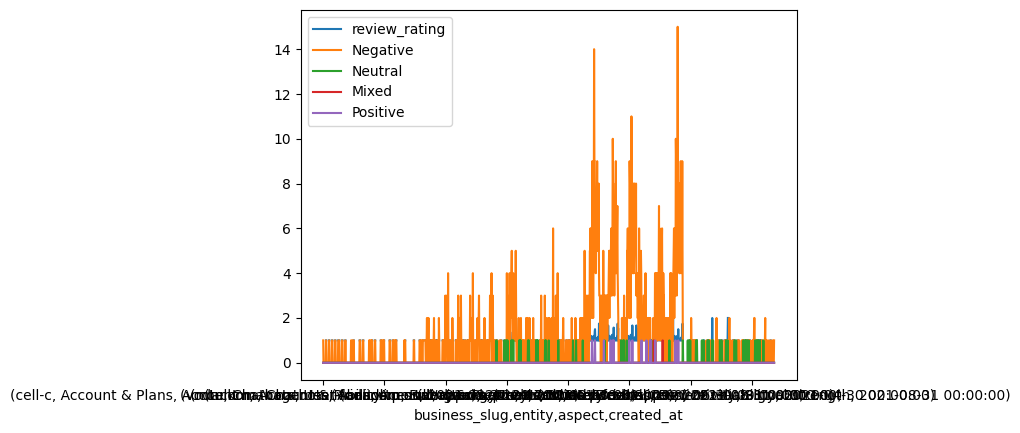

In [184]:
df_hp_monthly.plot()

In [185]:
# change the period and set the index
df_hp_monthly = df_hp_monthly \
    .reset_index() \
    .set_index('created_at') \
    .to_period('M') \
    .set_index(['business_slug', 'entity', 'aspect'], append=True) \
    .sort_index()

df_hp_monthly

review_rating  \
created_at business_slug entity             aspect                                                   
2021-01    vodacom       Account & Plans    Account management (online portal/apps)           1.00   
                         Billing & Payments Billing accuracy                                  1.00   
                                            Refunds/credits                                   1.00   
                         Chatbots           Ability to understand query                       1.00   
                                            Response accuracy                                 1.00   
...                                                                                            ...   
2023-07    vodacom       Customer Service   Availability (e.g., 24/7 support)                 1.50   
                                            Knowledge/competence                              2.00   
                                            Resolution time                                   2.00   
                                            Responsiveness                                    1.75   
                         Hardware/Devices   Setup/ease of installation                        2.00   

                                                                                     Negative  \
created_at business_slug entity             aspect                                              
2021-01    vodacom       Account & Plans    Account management (online portal/apps)         4   
                         Billing & Payments Billing accuracy                                1   
                                            Refunds/credits                                 2   
                         Chatbots           Ability to understand query                     5   
                                            Response accuracy                               3   
...                                                                                       ...   
2023-07    vodacom       Customer Service   Availability (e.g., 24/7 support)               2   
                                            Knowledge/competence                            3   
                                            Resolution time                                 2   
                                            Responsiveness                                  4   
                         Hardware/Devices   Setup/ease of installation                      1   

                                                                                     Neutral  \
created_at business_slug entity             aspect                                             
2021-01    vodacom       Account & Plans    Account management (online portal/apps)        0   
                         Billing & Payments Billing accuracy                               1   
                                            Refunds/credits                                0   
                         Chatbots           Ability to understand query                    0   
                                            Response accuracy                              0   
...                                                                                      ...   
2023-07    vodacom       Customer Service   Availability (e.g., 24/7 support)              0   
                                            Knowledge/competence                           0   
                                            Resolution time                                0   
                                            Responsiveness                                 0   
                         Hardware/Devices   Setup/ease of installation                     0   

                                                                                     Mixed  \
created_at business_slug entity             aspect                                           
2021-01    vodacom       Account & Plans    Account managem

In [186]:
df_hp_monthly.loc[('2023-01', 'vodacom')]

review_rating  \
entity                 aspect                                                   
Account & Plans        Account management (online portal/apps)       1.000000   
                       Plan flexibility                              1.000000   
                       Plan pricing                                       NaN   
                       Promotions and offers                              NaN   
                       Upgrade/downgrade process                     1.000000   
Billing & Payments     Billing accuracy                              1.000000   
                       Hidden charges                                     NaN   
                       Monthly costs                                      NaN   
                       Payment methods                               1.000000   
                       Refunds/credits                               1.000000   
Chatbots               Ability to understand query                   1.111111   
                       Escalation to human agents                    1.000000   
                       Response accuracy                             1.111111   
                       Speed of response                             1.000000   
                       User-friendliness                             1.125000   
Customer Service       Availability (e.g., 24/7 support)             1.000000   
                       Friendliness/professionalism                  1.000000   
                       Knowledge/competence                          1.166667   
                       Resolution time                               1.000000   
                       Responsiveness                                1.111111   
Hardware/Devices       Setup/ease of installation                         NaN   
Network & Connectivity Data speeds (4G, 5G, etc.)                    2.000000   
                       Dropped calls                                      NaN   
                       Network coverage                                   NaN   
                       Roaming                                            NaN   
                       Signal strength                               1.000000   
Value-added Services   Quality of service                                 NaN   

                                                                Negative  \
entity                 aspect                                              
Account & Plans        Account management (online portal/apps)         3   
                       Plan flexibility                                2   
                       Plan pricing                                    0   
                       Promotions and offers                           0   
                       Upgrade/downgrade process                       1   
Billing & Payments     Billing accuracy                                1   
                       Hidden charges                                  0   
                       Monthly costs                                   0   
                       Payment methods                                 1   
                       Refunds/credits                                 2   
Chatbots               Ability to understand query                     9   
                       Escalation to human agents                      3   
                       Response accuracy                               9   
                       Speed of response                               2   
                       User-friendliness                               8   
Customer Service       Availability (e.g., 24/7 support)               3   
                       Friendliness/professionalism                    2   
                       Knowledge/competence                            6   
                       Resolution time                                 4   
                       Responsiveness                                  9   
Hardware/Devices       Setup/ease of insta

In [187]:
df_hp_monthly.xs('Chatbots', level='entity')

review_rating  Negative  \
created_at business_slug aspect                                                 
2021-01    vodacom       Ability to understand query       1.000000         5   
                         Response accuracy                 1.000000         3   
                         User-friendliness                 1.000000         5   
2021-02    mtn           Ability to understand query       1.000000         1   
                         Response accuracy                 1.000000         1   
...                                                             ...       ...   
2023-07    vodacom       Ability to understand query       1.750000         4   
                         Escalation to human agents        1.666667         3   
                         Response accuracy                 1.750000         4   
                         Speed of response                 1.000000         0   
                         User-friendliness                 1.666667         3   

                                                      Neutral  Mixed  Positive  
created_at business_slug aspect                                                 
2021-01    vodacom       Ability to understand query        0      0         0  
                         Response accuracy                  0      0         0  
                         User-friendliness                  0      0         0  
2021-02    mtn           Ability to understand query        0      0         0  
                         Response accuracy                  0      0         0  
...                                                       ...    ...       ...  
2023-07    vodacom       Ability to understand query        0      0         0  
                         Escalation to human agents         0      0         0  
                         Response accuracy                  0      0         0  
                         Speed of response                  1      0         0  
                         User-friendliness                  0      0         0  

[401 rows x 5 columns]

In [188]:
df_hp_monthly.xs(
    key=('vodacom', 'Chatbots'),
    level=['business_slug', 'entity'])

review_rating  Negative  Neutral  \
created_at aspect                                                          
2021-01    Ability to understand query       1.000000         5        0   
           Response accuracy                 1.000000         3        0   
           User-friendliness                 1.000000         5        0   
2021-02    Ability to understand query       1.000000         5        0   
           Escalation to human agents        1.000000         3        0   
...                                               ...       ...      ...   
2023-07    Ability to understand query       1.750000         4        0   
           Escalation to human agents        1.666667         3        0   
           Response accuracy                 1.750000         4        0   
           Speed of response                 1.000000         0        1   
           User-friendliness                 1.666667         3        0   

                                        Mixed  Positive  
created_at aspect                                        
2021-01    Ability to understand query      0         0  
           Response accuracy                0         0  
           User-friendliness                0         0  
2021-02    Ability to understand query      0         0  
           Escalation to human agents       0         0  
...                                       ...       ...  
2023-07    Ability to understand query      0         0  
           Escalation to human agents       0         0  
           Response accuracy                0         0  
           Speed of response                0         0  
           User-friendliness                0         0  

[153 rows x 5 columns]

In [189]:
df_hp_monthly.loc[
    # row indexer
    (
        '2023-06',                          # June 2023
        slice(None),                        # all business slugs
        ['Chatbots', 'Customer Service'],   # chatbots and customer service
    ),
    # column indexer
    :
]

review_rating  \
created_at business_slug entity           aspect                                             
2023-06    mtn           Chatbots         Ability to understand query                  1.0   
                                          Escalation to human agents                   1.0   
                                          Response accuracy                            1.0   
                                          User-friendliness                            1.0   
                         Customer Service Availability (e.g., 24/7 support)            1.0   
                                          Friendliness/professionalism                 1.0   
                                          Knowledge/competence                         1.0   
                                          Resolution time                              1.0   
                                          Responsiveness                               1.0   
           vodacom       Chatbots         Ability to understand query                  1.0   
                                          Escalation to human agents                   1.0   
                                          Response accuracy                            1.0   
                                          Speed of response                            1.0   
                                          User-friendliness                            1.0   
                         Customer Service Availability (e.g., 24/7 support)            1.0   
                                          Friendliness/professionalism                 1.0   
                                          Knowledge/competence                         1.0   
                                          Resolution time                              1.0   
                                          Responsiveness                               1.0   

                                                                             Negative  \
created_at business_slug entity           aspect                                        
2023-06    mtn           Chatbots         Ability to understand query               1   
                                          Escalation to human agents                1   
                                          Response accuracy                         1   
                                          User-friendliness                         1   
                         Customer Service Availability (e.g., 24/7 support)         1   
                                          Friendliness/professionalism              1   
                                          Knowledge/competence                      1   
                                          Resolution time                           1   
                                          Responsiveness                            1   
           vodacom       Chatbots         Ability to understand query               8   
                                          Escalation to human agents                3   
                                          Response accuracy                         7   
                                          Speed of response                         1   
                                          User-friendliness                         8   
                         Customer Service Availability (e.g., 24/7 support)         4   
                                          Friendliness/professionalism              1   
                                          Knowledge/competence                      3   
                                          Resolution time                           1   
                                          Responsiveness                            9   

                                                                             Neutral  \
created_at business_slug entity           aspect                                       
2023-06    mtn           Chatbots         Ability to und

# Lecture 5: Aggregation and merging

source: https://learn.london.ac.uk/mod/page/view.php?id=111308&forceview=1

In [190]:
df_hp_monthly[['Negative', 'Neutral', 'Mixed', 'Positive']] \
    .groupby(['created_at', 'business_slug', 'entity']) \
    .sum()

Negative  Neutral  Mixed  \
created_at business_slug entity                                             
2021-01    cell-c        Account & Plans                0        0      0   
                         Billing & Payments             0        0      0   
                         Chatbots                       0        0      0   
                         Customer Service               0        0      0   
                         Hardware/Devices               0        0      0   
...                                                   ...      ...    ...   
2023-07    vodacom       Chatbots                      14        1      0   
                         Customer Service              11        0      0   
                         Hardware/Devices               1        0      0   
                         Network & Connectivity         0        0      0   
                         Value-added Services           0        0      0   

                                                 Positive  
created_at business_slug entity                            
2021-01    cell-c        Account & Plans                0  
                         Billing & Payments             0  
                         Chatbots                       0  
                         Customer Service               0  
                         Hardware/Devices               0  
...                                                   ...  
2023-07    vodacom       Chatbots                       0  
                         Customer Service               0  
                         Hardware/Devices               0  
                         Network & Connectivity         0  
                         Value-added Services           0  

[1085 rows x 4 columns]

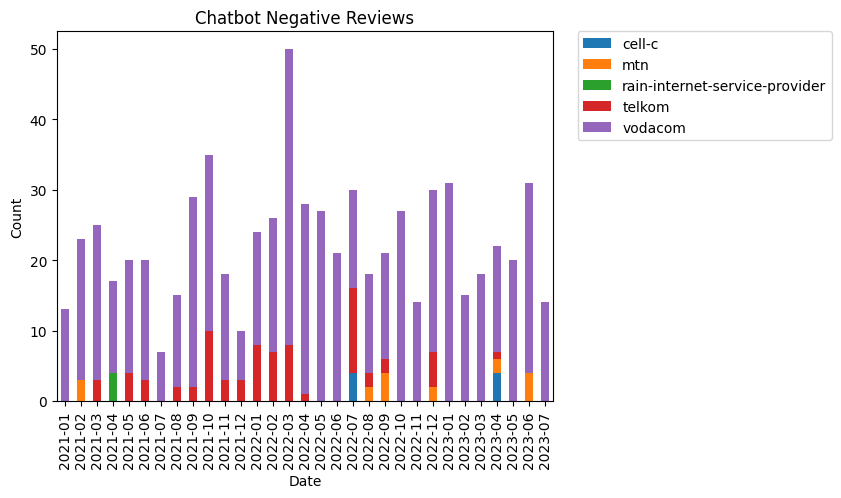

In [200]:
ax = df_hp_monthly['Negative'] \
    .xs('Chatbots', level='entity') \
    .groupby(['created_at', 'business_slug']) \
    .sum() \
    .unstack() \
    .plot(kind='bar', stacked=True)

#ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
ax.set_title('Chatbot Negative Reviews')
ax.set_xlabel('Date')
ax.set_ylabel('Count')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Remember the source dataset is selected from Hellopeter reviews that is specifically mentioning a chatbot. The following graphs thus show that in these reviews where aspects of the chatbot is specifically mentioned, the chatbot is mostly mentioned in a negative light.

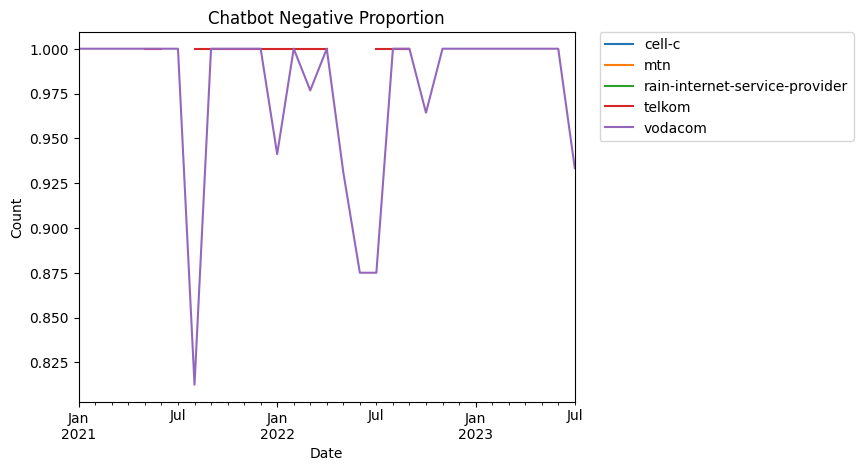

In [197]:
ax = df_hp_monthly \
    .assign(total=lambda x: x[['Negative', 'Neutral', 'Mixed', 'Positive']].sum(axis=1)) \
    [['Negative', 'total']] \
    .xs('Chatbots', level='entity') \
    .groupby(['created_at', 'business_slug']) \
    .sum() \
    .assign(negative_proportion=lambda x: x['Negative'] / x['total']) \
    ['negative_proportion'] \
    .unstack() \
    .plot()

ax.set_title('Chatbot Negative Proportion')
ax.set_xlabel('Date')
ax.set_ylabel('Count')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Lecture 6: Time-series analysis

source: https://learn.london.ac.uk/mod/page/view.php?id=111313&forceview=1